# Descriptive Statistics Project (P1)
**Note** Check data preprocessing notes 


In this project, we shall import a new dataset about cars and try to observe some of the measures. Some of the tasks we shall perform are: calculating mean, median, variance, standard deviation, plotting histograms, density plots, box plots and drawing inferences .

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from ggplot import mtcars
import seaborn as sns

In [16]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("mtcars", package="datasets").data
mtcars = pd.DataFrame(data)
print(mtcars.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                     
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
rownames                 
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


In [17]:
# 1. Mean of weights
mean_weight = mtcars['wt'].mean()
print(f"Mean weight: {mean_weight}")

Mean weight: 3.2172500000000004


In [ ]:
# 2. mean value of all the features for the car Toyota Corolla?
#.loc is used to access a group of rows and columns by labels or a boolean array while mtcars[] is used to select columns by their names.
mtcars.loc['Toyota Corolla'].mean()


np.float64(18.814090909090908)

In [20]:
# 3. median of wt
median_wt = mtcars['wt'].median()
print(f"Median weight: {median_wt}")

Median weight: 3.325


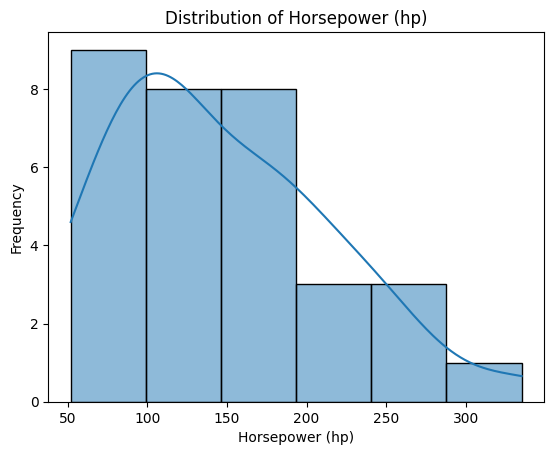

In [ ]:
# 4. Is 'hp' right-skewed
sns.histplot(mtcars['hp'], kde=True)
plt.title('Distribution of Horsepower (hp)')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Frequency')
plt.show()

#hp is right skewed as the tail on the right side of the distribution is longer or fatter than the left side. 
# This indicates that there are a few cars with very high horsepower values compared to the majority of cars in the dataset.

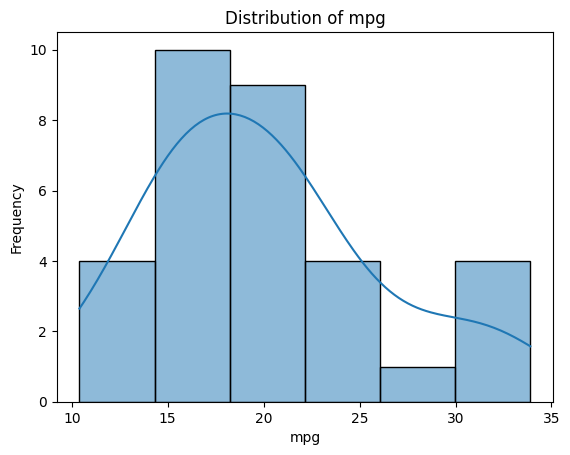

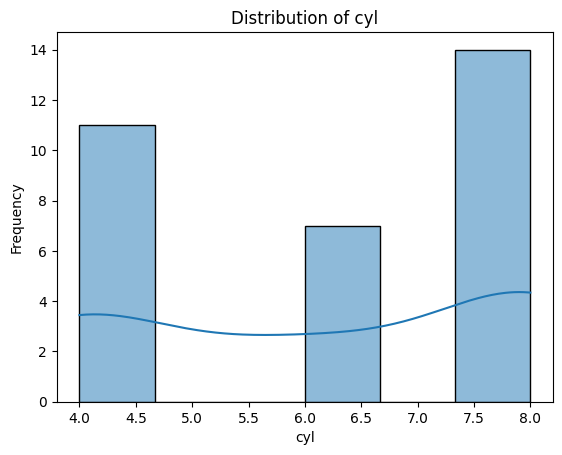

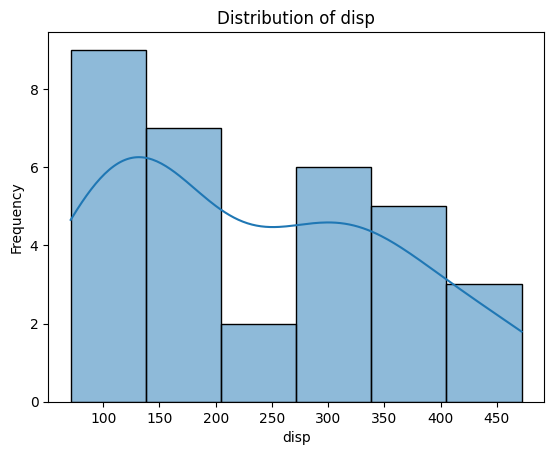

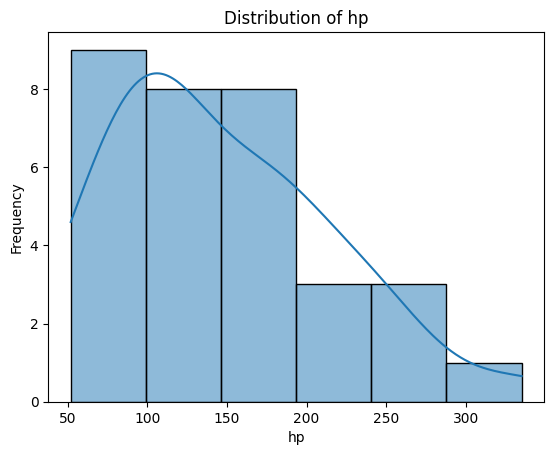

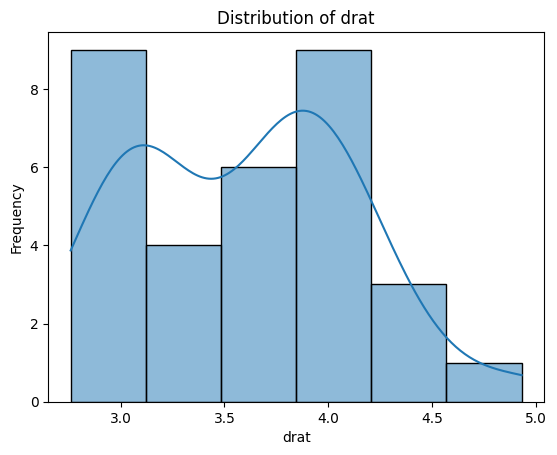

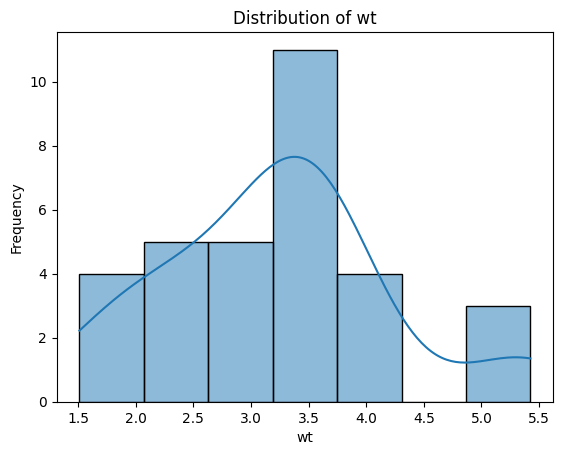

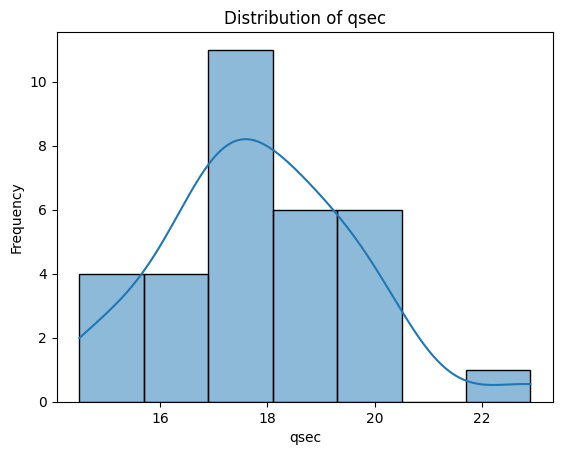

In [ ]:
# 5. Finding unimodal distribution among the features
features = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec']
for feature in features:
    sns.histplot(mtcars[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()  
    
# A unimodal distribution is a probability distribution that has a single peak or mode. 
# In the mtcars dataset, the features 'mpg', 'disp', 'hp', 'drat', 'wt', and 'qsec' exhibit unimodal distributions, as they each have a single prominent peak in their histograms. 
# The feature 'cyl' does not exhibit a unimodal distribution, as it has multiple peaks corresponding to the different numbers of cylinders (4, 6, and 8) in the cars.

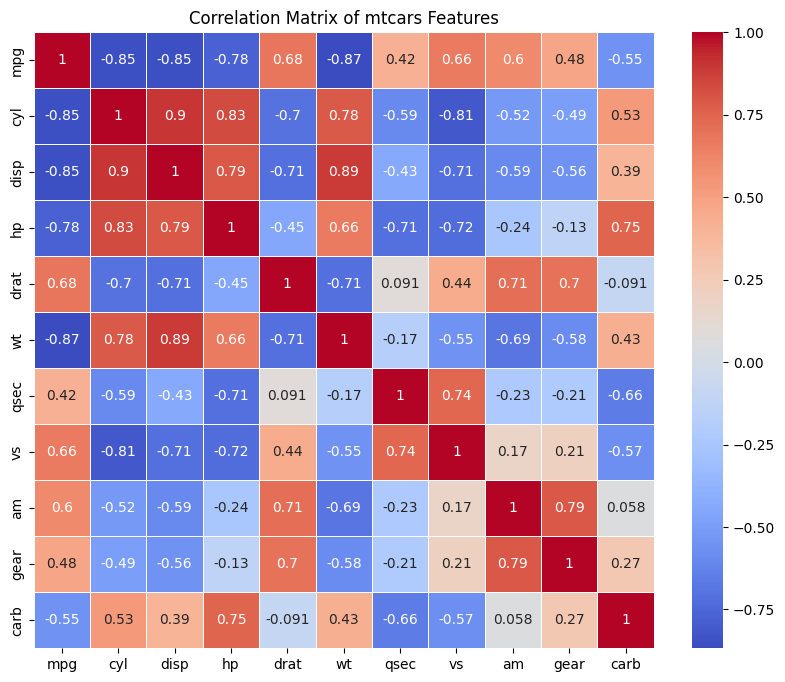

In [23]:
# 6. Finding corelation among the features
correlation_matrix = mtcars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of mtcars Features')
plt.show()

In [25]:
# 7. Columns which are negative skewed. Negatively skewed distribution has a longer or fatter tail on the left side of the distribution.This is also called left-skewed distribution.
skewness = mtcars.skew()
print(skewness[skewness < 0])

cyl   -0.192261
dtype: float64


In [27]:
# 8. Find columns which are most skewed to the right. Positively skewed distribution has a longer or fatter tail on the right side of the distribution. This is also called right-skewed distribution.
max_skewness = skewness.max()
print(skewness[skewness == max_skewness])

carb    1.157091
dtype: float64


In [ ]:
#9. IQR (Interquartile Range) of 'mpg' column
#The Interquartile Range (IQR) measures the spread of the middle 50% of the data. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).
Q1 = mtcars['mpg'].quantile(0.25)
Q3 = mtcars['mpg'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR of 'mpg': {IQR}")

IQR of 'mpg': 7.375


In [29]:
# 10. mean, standard deviation and variance of 'mpg' column
mean_mpg = mtcars['mpg'].mean()
std_mpg = mtcars['mpg'].std()
var_mpg = mtcars['mpg'].var()
print(f"Mean of 'mpg': {mean_mpg}")
print(f"Standard Deviation of 'mpg': {std_mpg}")
print(f"Variance of 'mpg': {var_mpg}")

Mean of 'mpg': 20.090625000000003
Standard Deviation of 'mpg': 6.026948052089104
Variance of 'mpg': 36.32410282258064


# Density Curves

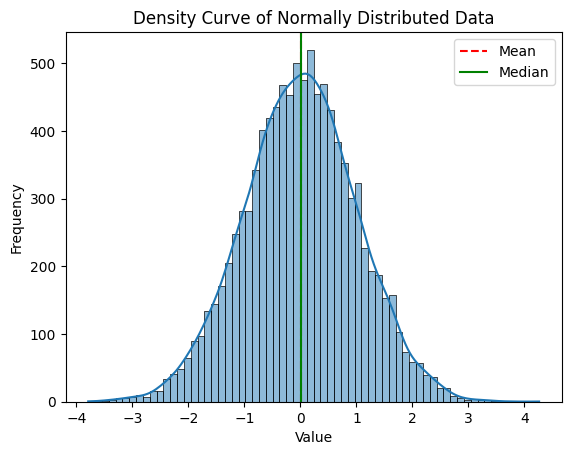

In [30]:
# Generate 10000 random normally distributed numbers and plot the density curve along with the median and mean.
normal_data = np.random.normal(loc=0, scale=1, size=10000)
sns.histplot(normal_data, kde=True)
plt.axvline(np.mean(normal_data), color='r', linestyle='--', label='Mean')
plt.axvline(np.median(normal_data), color='g', linestyle='-', label='Median')
plt.title('Density Curve of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

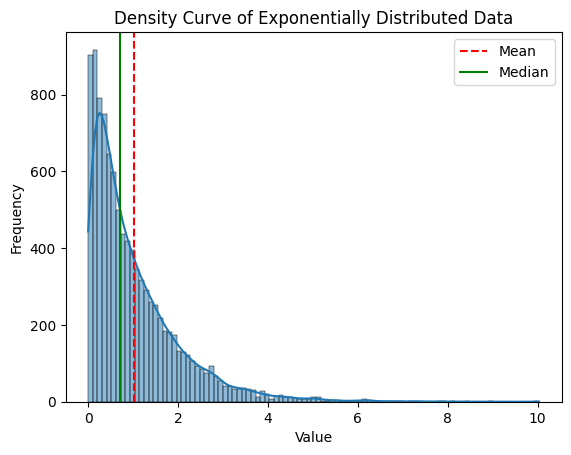

In [31]:
# Generate 10000 exponentially distributed numbers using np.random.exponential(size=100000) and plot the density curve along with the median and mean.
exponential_data = np.random.exponential(scale=1, size=10000)
sns.histplot(exponential_data, kde=True)
plt.axvline(np.mean(exponential_data), color='r', linestyle='--', label='Mean')
plt.axvline(np.median(exponential_data), color='g', linestyle='-', label='Median')
plt.title('Density Curve of Exponentially Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()